In [58]:
import scipy.io as sio
mat = sio.loadmat("./imdb/imdb.mat")

TypeError: 'NoneType' object is not iterable

In [ ]:
from IPython.core.display import Image 
idx = 211115
path ='./imdb_crop/' + mat['imdb'].item()[2][0][idx][0]
print(mat['imdb'].item()[4][0][idx][0])
Image(filename=path)

In [71]:
import numpy
embeddings = numpy.load('./embeddings.npy')
image_list = numpy.load('./image_list.npy')

In [76]:
image_list[-3]

'/root/famousfaces/imdb_crop/99/nm0000499_rm2364971776_1966-10-10_2005.jpg'

In [60]:
import scipy.spatial.distance as distance
min_dist = 1000
img_1 = None
img_2 = None
for idx1, emb1 in enumerate(embeddings):
    for idx2, emb2 in enumerate(embeddings):
        dist = distance.cosine(embeddings[idx1], embeddings[idx2])
        if idx1!=idx2 and dist > 0 and dist < min_dist:
            min_dist = distance.cosine(embeddings[idx1], embeddings[idx2])
            img_1 = idx1
            img_2 = idx2

KeyboardInterrupt: 

In [57]:
distance.cosine(embeddings[img_1], embeddings[img_2])


0.04373734784607897

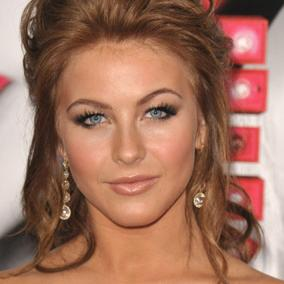

In [56]:
from IPython.core.display import Image 
Image(filename=image_list[img_1])

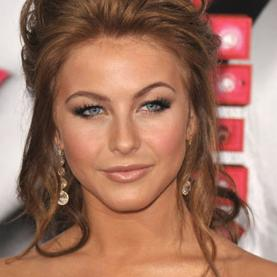

In [55]:
Image(filename=image_list[img_2])

In [ ]:
from annoy import AnnoyIndex
import random

f = 40
t = AnnoyIndex(f)  # Length of item vector that will be indexed
for i in xrange(1000):
    v = [random.gauss(0, 1) for z in xrange(f)]
    t.add_item(i, v)

t.build(10) # 10 trees
t.save('test.ann')


u = AnnoyIndex(f)
u.load('test.ann') # super fast, will just mmap the file
print(u.get_nns_by_item(0, 1000)) 